# CS:GO/CS2 Weapon Cases - Price Analysis
## Exploratory Data Analysis (EDA)

This notebook analyzes historical price data for CS:GO/CS2 weapon cases scraped from Steam Community Market.

**Dataset:** Pages 1-5 combined (50 items, last year of data)

**Analysis includes:**
- Data combination and cleaning
- Price statistics and trends
- Volatility analysis
- Correlation between items
- Time series visualization

<br>

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [4]:
# Read and combine the two CSV files
df_page12 = pd.read_csv("../case-prices-steam-data/page12_steam_weapon_cases_20251003_192417.csv")
df_page345 = pd.read_csv("../case-prices-steam-data/page345_steam_weapon_cases_20251003_193524.csv")

print(f"Page 1-2: {len(df_page12):,} records, {df_page12['item_name'].nunique()} unique items")
print(f"Page 3-4-5: {len(df_page345):,} records, {df_page345['item_name'].nunique()} unique items")

# Combine the dataframes
df = pd.concat([df_page12, df_page345], ignore_index=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by item_name and date
df = df.sort_values(['item_name', 'date']).reset_index(drop=True)

# Remove duplicates if any
original_len = len(df)
df = df.drop_duplicates()
duplicates_removed = original_len - len(df)

if duplicates_removed > 0:
    print(f"Removed {duplicates_removed} duplicate records")

print(f"\n Combined dataset:")
print(f"   Total records: {len(df):,}")
print(f"   Unique items: {df['item_name'].nunique()}")
print(f"   Date range: {df['date'].min()} to {df['date'].max()}")
print(f"   Price range: ${df['price'].min():.2f} to ${df['price'].max():.2f}")

# Save combined CSV
df.to_csv("csv-files/page12345_steam_cases.csv", index=False)
print(f"\n Saved to: page12345_steam_cases.csv")

Page 1-2: 20,235 records, 20 unique items
Page 3-4-5: 30,313 records, 30 unique items

 Combined dataset:
   Total records: 50,548
   Unique items: 50
   Date range: 2024-10-04 01:00:00 to 2025-10-03 16:00:00
   Price range: $0.04 to $43.47

 Saved to: page12345_steam_cases.csv


<br>


### First 10 row

In [5]:
# Display first few rows
df.head(10)

,item_name,date,price
0,2020 RMR Challengers,2024-10-04 01:00:00,0.207
1,2020 RMR Challengers,2024-10-05 01:00:00,0.219
2,2020 RMR Challengers,2024-10-06 01:00:00,0.224
3,2020 RMR Challengers,2024-10-07 01:00:00,0.209
4,2020 RMR Challengers,2024-10-08 01:00:00,0.203
5,2020 RMR Challengers,2024-10-09 01:00:00,0.194
6,2020 RMR Challengers,2024-10-10 01:00:00,0.204
7,2020 RMR Challengers,2024-10-11 01:00:00,0.212
8,2020 RMR Challengers,2024-10-12 01:00:00,0.223
9,2020 RMR Challengers,2024-10-13 01:00:00,0.234


<br>

### Dataset information 

In [6]:
# Basic dataset information
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50548 entries, 0 to 50547
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   item_name  50548 non-null  object        
 1   date       50548 non-null  datetime64[ns]
 2   price      50548 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB
None

Statistical Summary:
                                date         price
count                          50548  50548.000000
mean   2025-07-26 11:27:10.497744384      1.993474
min              2024-10-04 01:00:00      0.041000
25%              2025-07-09 01:00:00      0.305000
50%              2025-09-12 06:00:00      0.639000
75%              2025-09-23 00:00:00      2.272250
max              2025-10-03 16:00:00     43.470000
std                              NaN      2.980764


<br>

#### Item Count

In [7]:
# Count of records per item
item_counts = df.groupby('item_name').size().sort_values(ascending=False)
print("Records per item:")
print(item_counts)

Records per item:
item_name
Chroma 3 Case                                   1054
Antwerp 2022 Contenders Sticker Capsule         1054
Clutch Case                                     1054
CS20 Case                                       1054
Chroma 2 Case                                   1054
Danger Zone Case                                1054
Operation Phoenix Weapon Case                   1054
Operation Breakout Weapon Case                  1054
Paris 2023 Challengers Sticker Capsule          1054
Paris 2023 Challengers Autograph Capsule        1054
Horizon Case                                    1054
Kilowatt Case                                   1054
Gamma Case                                      1054
Glove Case                                      1054
Gamma 2 Case                                    1054
Fracture Case                                   1054
Falchion Case                                   1054
Dreams & Nightmares Case                        1054
Snakebite Case    

<br>


#### Item statistics

In [8]:
# Price statistics by item
price_stats = df.groupby('item_name')['price'].agg(['mean', 'min', 'max', 'std']).round(2)
price_stats = price_stats.sort_values('mean', ascending=False)
print("Price Statistics by Item:")
print(price_stats)

Price Statistics by Item:
                                               mean   min    max   std
item_name                                                             
Glove Case                                    14.85  7.13  24.93  3.16
Operation Breakout Weapon Case                11.07  7.92  14.14  1.44
Operation Phoenix Weapon Case                  6.36  4.00   7.84  0.84
Spectrum Case                                  6.04  3.49   7.90  0.94
Sealed Genesis Terminal                        5.86  1.63  43.47  4.43
Chroma 2 Case                                  4.85  2.99   6.17  0.70
Gamma Case                                     4.70  2.77   7.93  0.69
Gamma 2 Case                                   4.61  2.79   7.48  0.66
Chroma 3 Case                                  4.50  2.66   5.78  0.67
Spectrum 2 Case                                4.21  2.26   5.62  0.72
Revolver Case                                  4.11  2.26   5.29  0.71
Horizon Case                                   2.29

<br>

#### Price History of 5 most expensive items

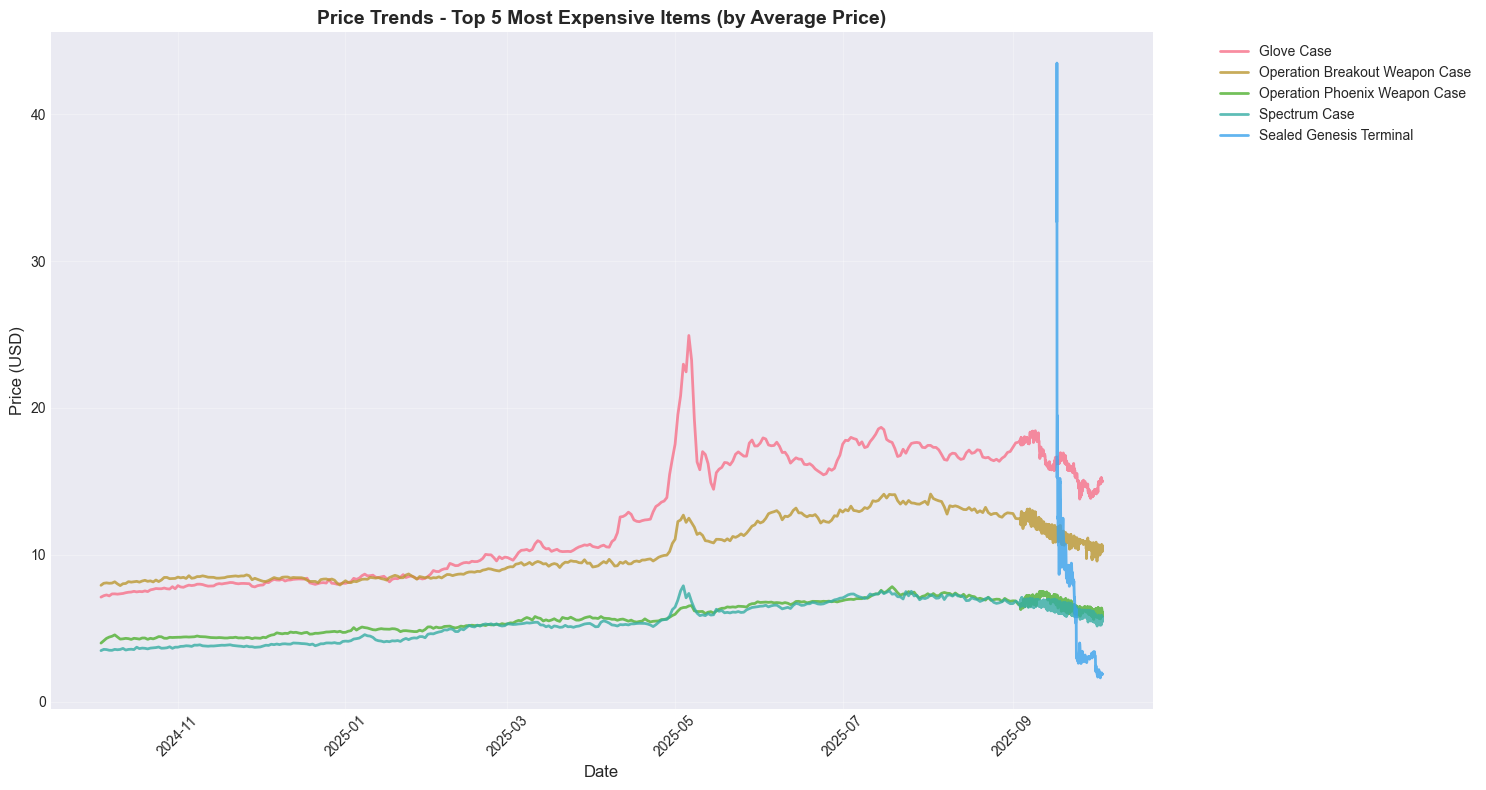

In [9]:
# Plot: Price trends for top 5 most expensive items (by average price)
top_5_expensive = price_stats.head(5).index

plt.figure(figsize=(15, 8))
for item in top_5_expensive:
    item_data = df[df['item_name'] == item]
    plt.plot(item_data['date'], item_data['price'], label=item, linewidth=2, alpha=0.8)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Price Trends - Top 5 Most Expensive Items (by Average Price)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<br>

#### Price distribution of 10 most expenside item using boxplot 

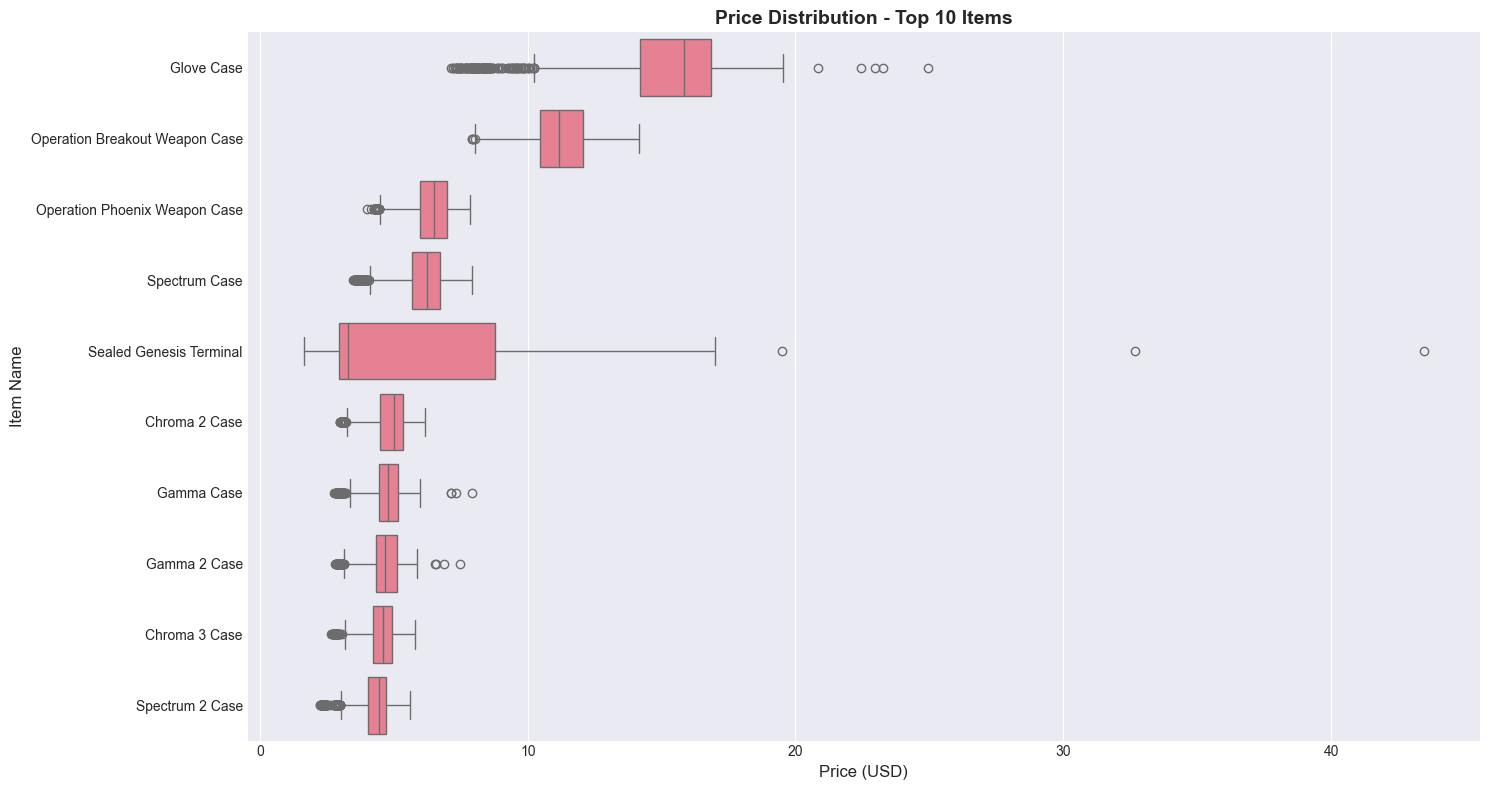

In [10]:
# Plot: Price distribution (box plot)
plt.figure(figsize=(15, 8))
top_10_items = price_stats.head(10).index
df_top10 = df[df['item_name'].isin(top_10_items)]

sns.boxplot(data=df_top10, y='item_name', x='price', order=top_10_items)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Item Name', fontsize=12)
plt.title('Price Distribution - Top 10 Items', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<br>

#### Average Price by Item

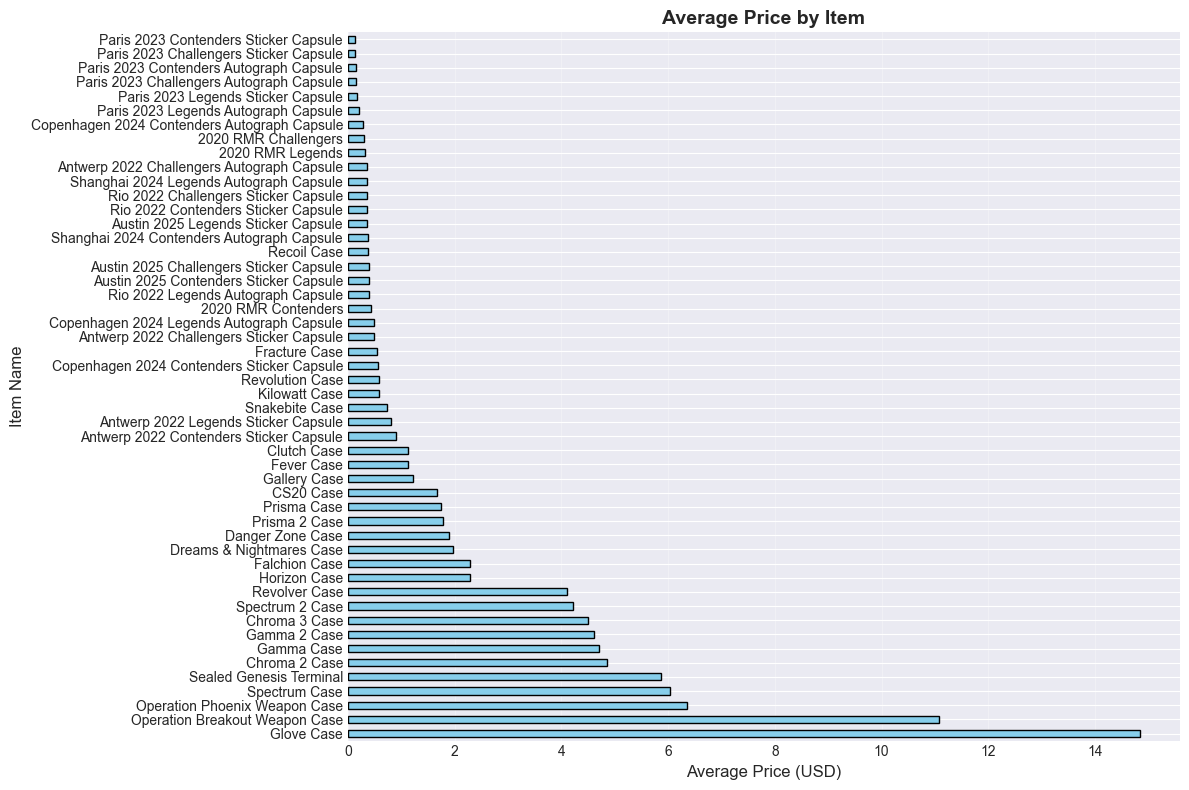

In [11]:
# Plot: Average price comparison
plt.figure(figsize=(12, 8))
price_stats['mean'].plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average Price (USD)', fontsize=12)
plt.ylabel('Item Name', fontsize=12)
plt.title('Average Price by Item', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

<br>

#### Price volatility

* If prices move up and down a lot → high volatility
* If prices stay stable, barely changing → low volatility

In [12]:
# Calculate price volatility (coefficient of variation)
df_volatility = df.groupby('item_name')['price'].agg(['mean', 'std'])
df_volatility['cv'] = (df_volatility['std'] / df_volatility['mean']) * 100
df_volatility = df_volatility.sort_values('cv', ascending=False)

print("📊 Price Volatility (Coefficient of Variation %):")
print(df_volatility[['cv']].head(10))

📊 Price Volatility (Coefficient of Variation %):
                                                   cv
item_name                                            
Shanghai 2024 Legends Autograph Capsule     79.561126
Austin 2025 Contenders Sticker Capsule      76.353744
Sealed Genesis Terminal                     75.544116
Austin 2025 Challengers Sticker Capsule     63.717905
Austin 2025 Legends Sticker Capsule         56.242030
Shanghai 2024 Contenders Autograph Capsule  39.609500
Antwerp 2022 Contenders Sticker Capsule     39.578475
Rio 2022 Challengers Sticker Capsule        39.454683
Antwerp 2022 Legends Sticker Capsule        35.216011
Copenhagen 2024 Contenders Sticker Capsule  34.813715


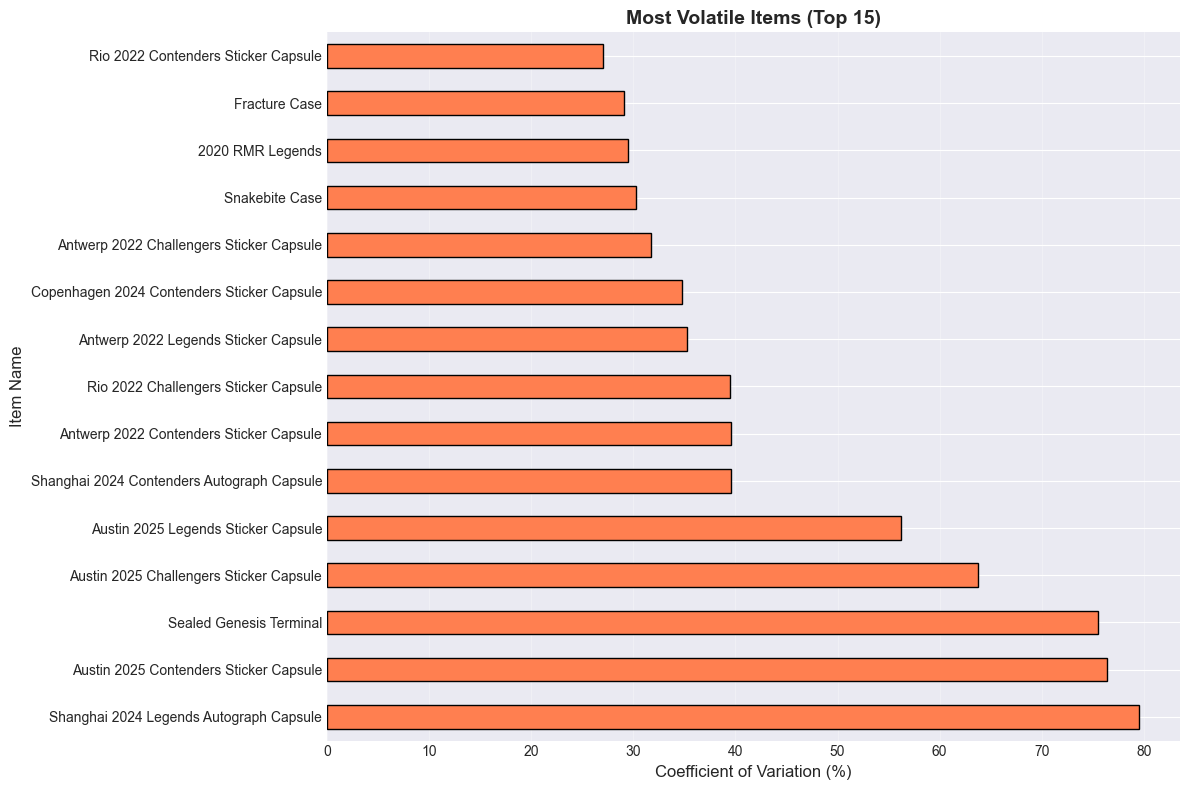

In [13]:
# Plot: Most volatile items
plt.figure(figsize=(12, 8))
df_volatility['cv'].head(15).plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel('Coefficient of Variation (%)', fontsize=12)
plt.ylabel('Item Name', fontsize=12)
plt.title('Most Volatile Items (Top 15)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

<br>

### Average market price over 1 year

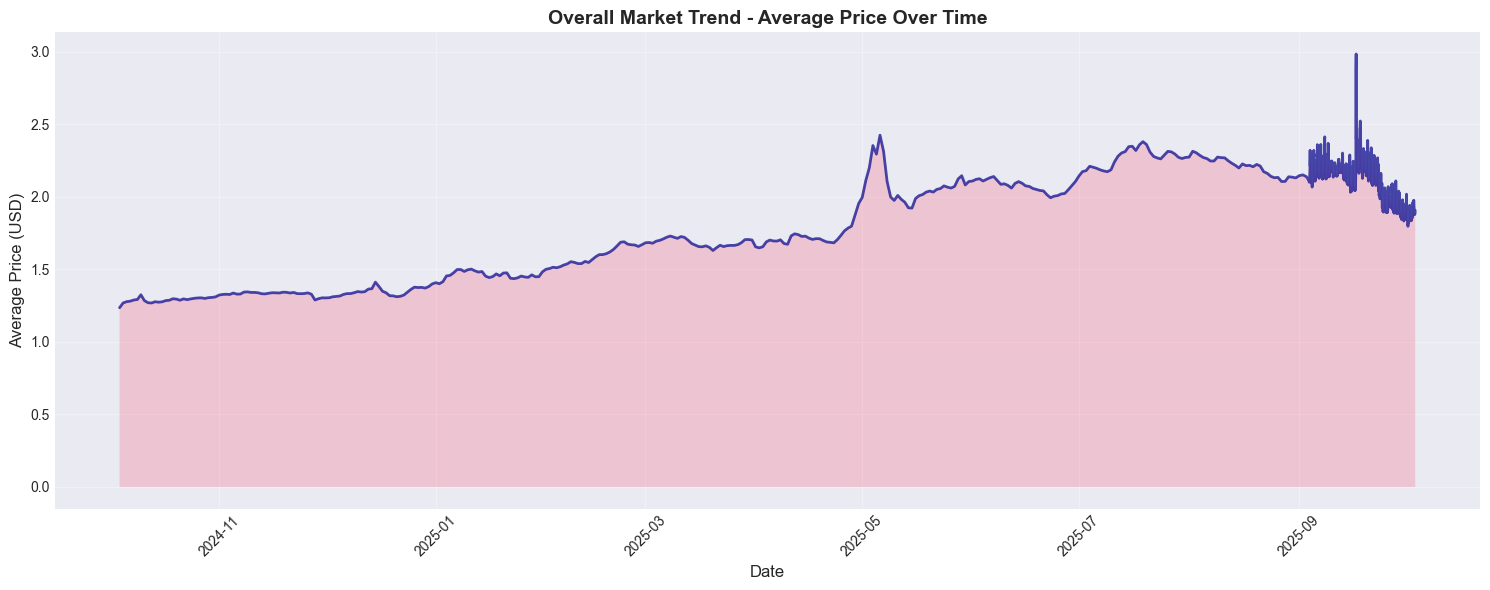

In [14]:
# Time series analysis: Overall market trend
daily_avg = df.groupby('date')['price'].mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_avg.index, daily_avg.values, linewidth=2, color='darkblue', alpha=0.7)
plt.fill_between(daily_avg.index, daily_avg.values, alpha=0.3)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.title('Overall Market Trend - Average Price Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<br>

In [15]:
# Summary statistics
print(f"\nTotal Items: {df['item_name'].nunique()}")
print(f"Total Records: {len(df):,}")
print(f"Date Range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Overall Price Range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
print(f"Overall Average Price: ${df['price'].mean():.2f}")
print(f"Overall Median Price: ${df['price'].median():.2f}")
print(f"\nMost Expensive Item (avg): {price_stats.index[0]} (${price_stats.iloc[0]['mean']:.2f})")
print(f"Cheapest Item (avg): {price_stats.index[-1]} (${price_stats.iloc[-1]['mean']:.2f})")
print(f"Most Volatile Item: {df_volatility.index[0]} (CV: {df_volatility.iloc[0]['cv']:.2f}%)")


Total Items: 50
Total Records: 50,548
Date Range: 2024-10-04 to 2025-10-03
Overall Price Range: $0.04 - $43.47
Overall Average Price: $1.99
Overall Median Price: $0.64

Most Expensive Item (avg): Glove Case ($14.85)
Cheapest Item (avg): Paris 2023 Contenders Sticker Capsule ($0.13)
Most Volatile Item: Shanghai 2024 Legends Autograph Capsule (CV: 79.56%)


<br>

### Effect of player number on prices

In [18]:
# Load player count data
df_players = pd.read_csv('csv-files/csgo_daily_avg_players_last_year.csv')
df_players['Date'] = pd.to_datetime(df_players['Date'])

print(f" Player Count Data:")
print(f" Records: {len(df_players)} days")
print(f" Date range: {df_players['Date'].min()} to {df_players['Date'].max()}")
print(f" Player range: {df_players['Average_Players'].min():,.0f} to {df_players['Average_Players'].max():,.0f}")
print(f"\n{df_players.head()}")

 Player Count Data:
 Records: 365 days
 Date range: 2024-10-04 00:00:00 to 2025-10-03 00:00:00
 Player range: 870,136 to 1,862,531

        Date  Average_Players
0 2024-10-04        1322412.0
1 2024-10-05        1363110.0
2 2024-10-06        1462028.0
3 2024-10-07        1363872.0
4 2024-10-08        1400121.0


In [19]:
# Calculate daily average price for all items
df['date_only'] = df['date'].dt.date
daily_avg_price = df.groupby('date_only')['price'].mean().reset_index()
daily_avg_price.columns = ['Date', 'Average_Price']
daily_avg_price['Date'] = pd.to_datetime(daily_avg_price['Date'])

print(f" Daily Average Price:")
print(f" Records: {len(daily_avg_price)} days")
print(f"\n{daily_avg_price.head()}")

 Daily Average Price:
 Records: 365 days

        Date  Average_Price
0 2024-10-04       1.235762
1 2024-10-05       1.268976
2 2024-10-06       1.277619
3 2024-10-07       1.280976
4 2024-10-08       1.289214


In [20]:
# Merge player count and price data
merged_df = pd.merge(df_players, daily_avg_price, on='Date', how='inner')

print(f" Merged Data:")
print(f" Records: {len(merged_df)} days")
print(f"\n{merged_df.head()}")
print(f"\n Basic Statistics:")
print(merged_df[['Average_Players', 'Average_Price']].describe())

 Merged Data:
 Records: 365 days

        Date  Average_Players  Average_Price
0 2024-10-04        1322412.0       1.235762
1 2024-10-05        1363110.0       1.268976
2 2024-10-06        1462028.0       1.277619
3 2024-10-07        1363872.0       1.280976
4 2024-10-08        1400121.0       1.289214

 Basic Statistics:
       Average_Players  Average_Price
count     3.650000e+02     365.000000
mean      1.461212e+06       1.770753
std       2.121003e+05       0.357752
min       8.701356e+05       1.235762
25%       1.350892e+06       1.415578
50%       1.465724e+06       1.702556
75%       1.621288e+06       2.119210
max       1.862531e+06       2.425196


In [21]:
# Calculate correlation between player count and prices
correlation = merged_df['Average_Players'].corr(merged_df['Average_Price'])

print(f" Pearson Correlation Coefficient: {correlation:.4f}")

 Pearson Correlation Coefficient: -0.2184


<br>

#### Player Count - Price Average over a year

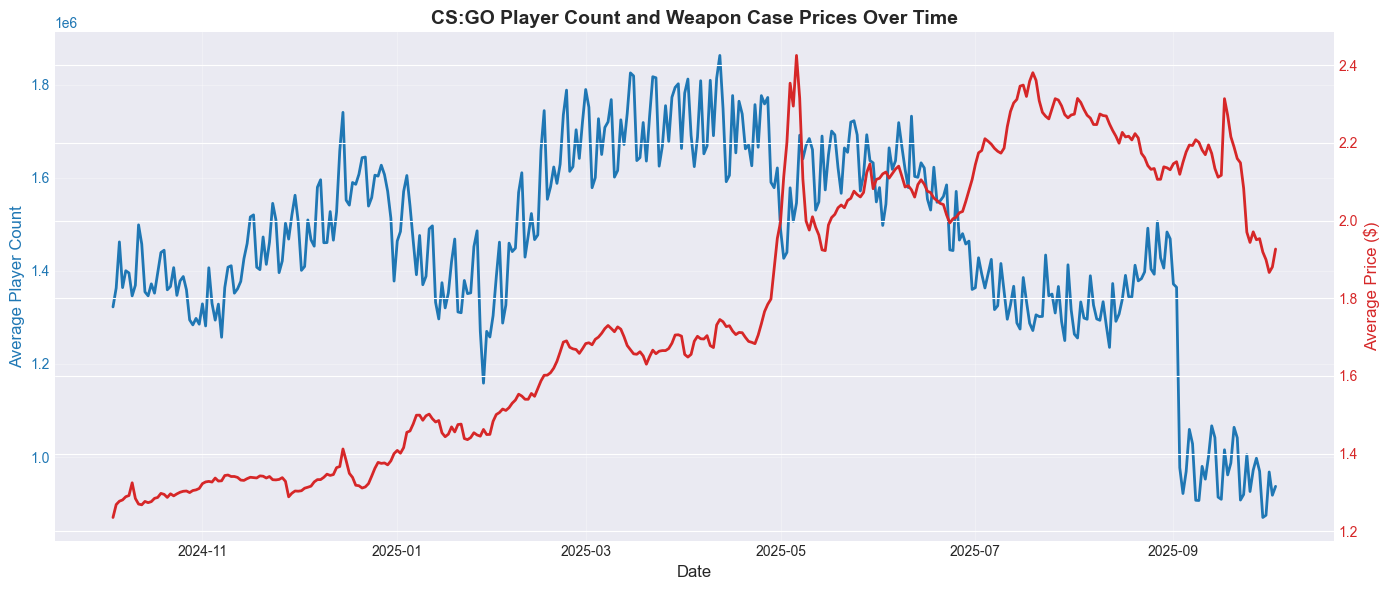

In [22]:
# Time series comparison with dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot player count on left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Average Player Count', color=color1, fontsize=12)
ax1.plot(merged_df['Date'], merged_df['Average_Players'], color=color1, linewidth=2, label='Player Count')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Plot price on right y-axis
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Average Price ($)', color=color2, fontsize=12)
ax2.plot(merged_df['Date'], merged_df['Average_Price'], color=color2, linewidth=2, label='Average Price')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('CS:GO Player Count and Weapon Case Prices Over Time', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

<br>

### Event - Price Relation

In [23]:
# Load tournament event data
df_events = pd.read_csv('csv-files/csgo_tournament_events_daily_last_year.csv')
df_events['Date'] = pd.to_datetime(df_events['Date'])

print(f" Tournament Event Data:")
print(f" Total days: {len(df_events)}")
print(f" Days with tournaments: {df_events['has_tournament'].sum()} ({df_events['has_tournament'].sum()/len(df_events)*100:.1f}%)")
print(f" Days without tournaments: {(df_events['has_tournament']==0).sum()} ({(df_events['has_tournament']==0).sum()/len(df_events)*100:.1f}%)")
print(f"\n{df_events.head()}")

 Tournament Event Data:
 Total days: 365
 Days with tournaments: 178 (48.8%)
 Days without tournaments: 187 (51.2%)

        Date  has_tournament
0 2024-10-04               0
1 2024-10-05               0
2 2024-10-06               0
3 2024-10-07               1
4 2024-10-08               1


In [24]:
# Merge event data with price data
merged_events = pd.merge(df_events, daily_avg_price, on='Date', how='inner')

print(f" Merged Event-Price Data:")
print(f" Total records: {len(merged_events)}")
print(f"\n{merged_events.head(10)}")

# Calculate average prices for tournament vs non-tournament days
avg_price_tournament = merged_events[merged_events['has_tournament']==1]['Average_Price'].mean()
avg_price_no_tournament = merged_events[merged_events['has_tournament']==0]['Average_Price'].mean()

print(f"\n Price Comparison:")
print(f"   Average price on tournament days: ${avg_price_tournament:.4f}")
print(f"   Average price on non-tournament days: ${avg_price_no_tournament:.4f}")
print(f"   Difference: ${avg_price_tournament - avg_price_no_tournament:.4f} ({((avg_price_tournament/avg_price_no_tournament - 1)*100):.2f}%)")

 Merged Event-Price Data:
 Total records: 365

        Date  has_tournament  Average_Price
0 2024-10-04               0       1.235762
1 2024-10-05               0       1.268976
2 2024-10-06               0       1.277619
3 2024-10-07               1       1.280976
4 2024-10-08               1       1.289214
5 2024-10-09               1       1.292238
6 2024-10-10               1       1.325047
7 2024-10-11               1       1.284767
8 2024-10-12               1       1.270349
9 2024-10-13               1       1.268395

 Price Comparison:
   Average price on tournament days: $1.8069
   Average price on non-tournament days: $1.7364
   Difference: $0.0705 (4.06%)


C:\Users\sirom\AppData\Local\Temp\ipykernel_20356\803896238.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data_to_plot, labels=['No Tournament', 'Tournament'], patch_artist=True)


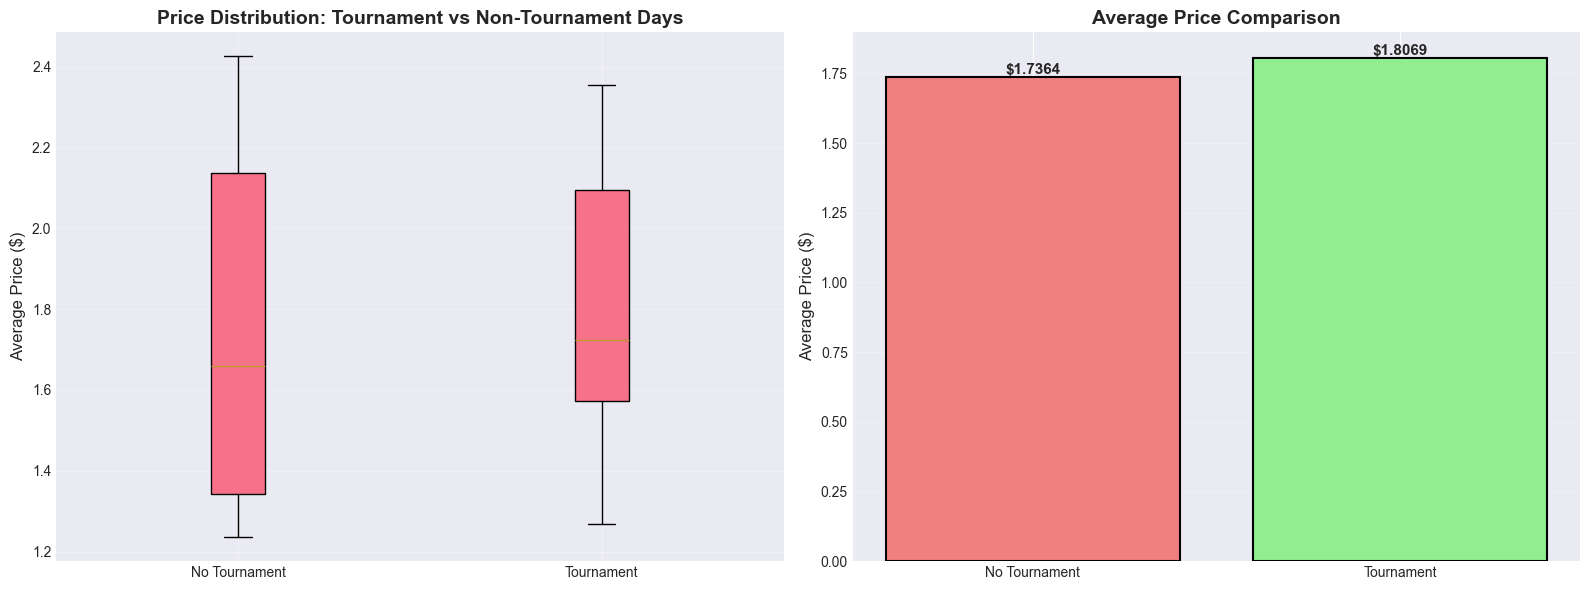

In [25]:
# Visualize price difference between tournament and non-tournament days
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Box plot comparison
data_to_plot = [
    merged_events[merged_events['has_tournament']==0]['Average_Price'],
    merged_events[merged_events['has_tournament']==1]['Average_Price']
]
ax1.boxplot(data_to_plot, labels=['No Tournament', 'Tournament'], patch_artist=True)
ax1.set_ylabel('Average Price ($)', fontsize=12)
ax1.set_title('Price Distribution: Tournament vs Non-Tournament Days', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Bar chart comparison
categories = ['No Tournament', 'Tournament']
averages = [avg_price_no_tournament, avg_price_tournament]
colors = ['lightcoral', 'lightgreen']
bars = ax2.bar(categories, averages, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Average Price ($)', fontsize=12)
ax2.set_title('Average Price Comparison', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Tournament - Price relation over a year

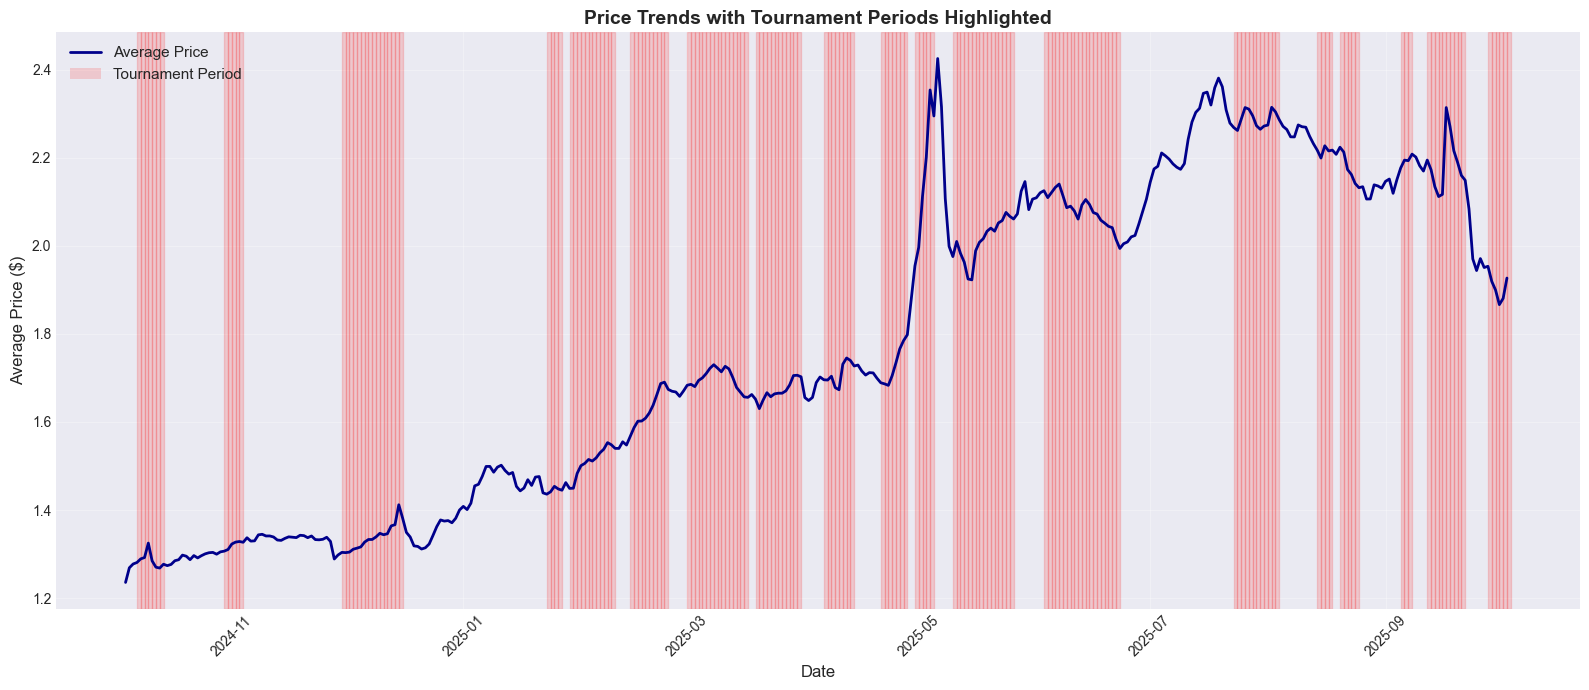

Red shaded areas indicate tournament periods


In [26]:
# Time series visualization with tournament periods highlighted
plt.figure(figsize=(16, 7))

# Plot price line
plt.plot(merged_events['Date'], merged_events['Average_Price'], 
         linewidth=2, color='darkblue', label='Average Price', zorder=2)

# Highlight tournament periods with background color
tournament_days = merged_events[merged_events['has_tournament']==1]
for date in tournament_days['Date']:
    plt.axvspan(date, date + pd.Timedelta(days=1), alpha=0.15, color='red', zorder=1)

# Add custom legend for highlighted areas
from matplotlib.patches import Patch
legend_elements = [
    plt.Line2D([0], [0], color='darkblue', linewidth=2, label='Average Price'),
    Patch(facecolor='red', alpha=0.15, label='Tournament Period')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=11)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.title('Price Trends with Tournament Periods Highlighted', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Red shaded areas indicate tournament periods")

In [27]:
# Statistical test: t-test to check if difference is significant
from scipy import stats

tournament_prices = merged_events[merged_events['has_tournament']==1]['Average_Price']
no_tournament_prices = merged_events[merged_events['has_tournament']==0]['Average_Price']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(tournament_prices, no_tournament_prices)


print(f"   t-statistic: {t_statistic:.4f}")
print(f"   p-value: {p_value:.6f}")

   t-statistic: 1.8881
   p-value: 0.059808


<br>

#### Weekend Effect Analysis

In [28]:
# Add weekend indicator to daily price data
daily_avg_price['Date'] = pd.to_datetime(daily_avg_price['Date'])
daily_avg_price['day_of_week'] = daily_avg_price['Date'].dt.dayofweek  # Monday=0, Sunday=6
daily_avg_price['is_weekend'] = daily_avg_price['day_of_week'].isin([5, 6])  # Saturday=5, Sunday=6

# Calculate statistics
weekend_prices = daily_avg_price[daily_avg_price['is_weekend']==True]['Average_Price']
weekday_prices = daily_avg_price[daily_avg_price['is_weekend']==False]['Average_Price']

avg_price_weekend = weekend_prices.mean()
avg_price_weekday = weekday_prices.mean()

print(f"  Weekend vs Weekday Price Analysis:")
print(f"  Total days: {len(daily_avg_price)}")
print(f"  Weekend days: {daily_avg_price['is_weekend'].sum()} ({daily_avg_price['is_weekend'].sum()/len(daily_avg_price)*100:.1f}%)")
print(f"  Weekday days: {(~daily_avg_price['is_weekend']).sum()} ({(~daily_avg_price['is_weekend']).sum()/len(daily_avg_price)*100:.1f}%)")
print()
print(f"  Price Comparison:")
print(f"  Average price on weekends: ${avg_price_weekend:.4f}")
print(f"  Average price on weekdays: ${avg_price_weekday:.4f}")
print(f"  Difference: ${avg_price_weekend - avg_price_weekday:.4f} ({(avg_price_weekend - avg_price_weekday)/avg_price_weekday*100:.2f}%)")

  Weekend vs Weekday Price Analysis:
  Total days: 365
  Weekend days: 104 (28.5%)
  Weekday days: 261 (71.5%)

  Price Comparison:
  Average price on weekends: $1.7747
  Average price on weekdays: $1.7692
  Difference: $0.0055 (0.31%)


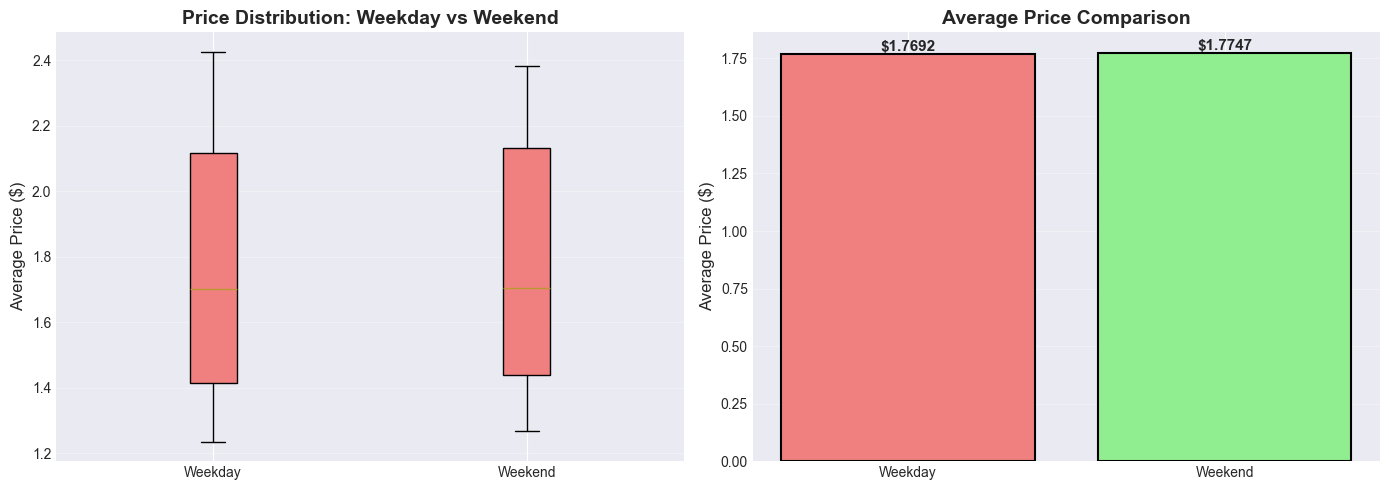

In [29]:
# Visualizations: Box plot and bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
data_to_plot = [weekday_prices, weekend_prices]
bp = ax1.boxplot(data_to_plot, tick_labels=['Weekday', 'Weekend'], patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightcoral')
ax1.set_ylabel('Average Price ($)', fontsize=12)
ax1.set_title('Price Distribution: Weekday vs Weekend', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Bar chart
categories = ['Weekday', 'Weekend']
averages = [avg_price_weekday, avg_price_weekend]
colors = ['lightcoral', 'lightgreen']
bars = ax2.bar(categories, averages, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Average Price ($)', fontsize=12)
ax2.set_title('Average Price Comparison', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, avg in zip(bars, averages):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${avg:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

<br>

#### Average Prices by day

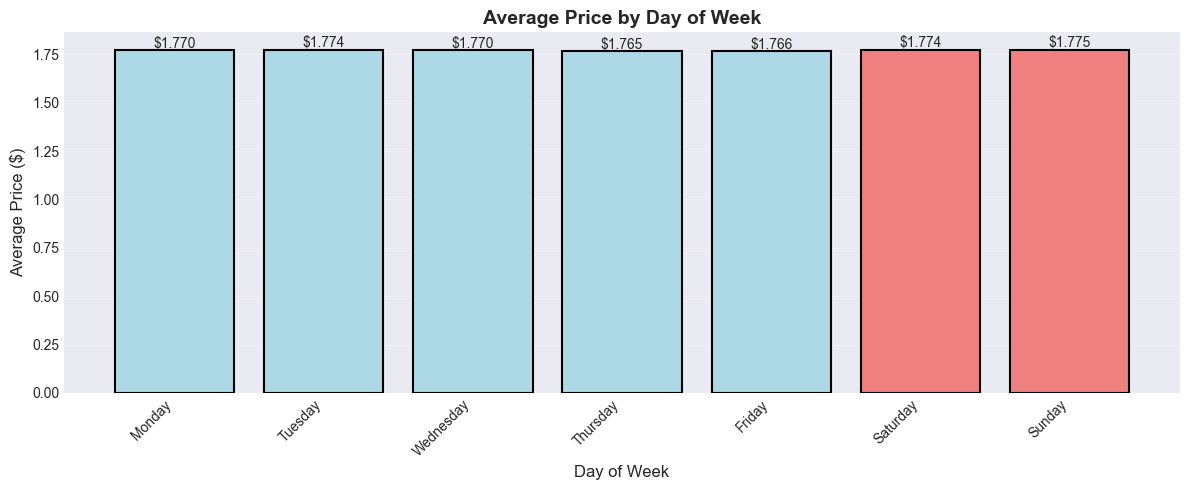

In [30]:
# Day of week breakdown
daily_avg_price['day_name'] = daily_avg_price['Date'].dt.day_name()

# Calculate average price for each day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_avg_prices = daily_avg_price.groupby('day_name')['Average_Price'].mean().reindex(day_order)

# Visualization
plt.figure(figsize=(12, 5))
colors = ['lightcoral' if day in ['Saturday', 'Sunday'] else 'lightblue' for day in day_order]
bars = plt.bar(day_order, day_avg_prices, color=colors, edgecolor='black', linewidth=1.5)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Average Price by Day of Week', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, avg in zip(bars, day_avg_prices):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${avg:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()